# Lecture 13

October 21, 2024

I lectured for a while on Least Squares, and its relationship to orthogonal projection. Here are some related problems.

**References:**

* Sergei Treil's *[Linear Algebra Done Wrong](https://www.math.brown.edu/streil/papers/LADW/LADW.html),* Chapter 5. (This is a freely available linear algebra book.)
* Computational mathematics with SageMath has discussions of Least Squares in Sections 2.4 and Chapter 13 (more technical).

## Problem 1

Consider a polygonal loop in $\mathbb R^2$ given as a list of `vertices` $[v_0, v_1, \ldots, v_n=v_0]$ together with an increasing sequence of `times` $[t_0=0, t_1, \ldots, t_n]$. From this information, we can define a path 
$$\gamma:[0, t_n] \to \mathbb R^2$$
as a concatenation of (affine) linear parameterizations of line segments $[t_i, t_{i+1}] \to \overline{v_i, v_{i+1}}.$

By rescaling time, we may assume that $t_n=2 \pi$. A *finite Fourier series of period $2\pi$* is a sum of the form
$$a_0 + \sum_{n=1}^N \left[a_n \cos(nx) + b_n \sin(nx)\right].$$
We'll call $N$ the *frequency bound*. Given a positive integer `frequency_bound` and the data above, compute the best approximation to $\gamma$ by a pair of function $\phi(t) = \big(x(t), y(t)\big)$ where both $x(t)$ and $y(t)$ are finite Fourier series of period $2\pi$ with frequency bound `frequency_bound`. Here *best* should be intepretted as minimizing the square integral
$$\int_0^{2\pi} \big\|\gamma(t)-\phi(t)\big\|^2~dt,$$
where $\| \cdot \|$ denotes the Euclidean norm of a vector.

In [1]:
frequency_bound = 6
vertices = [(0, -2), (2, 1), (1, 2), (0, 3/4), (0, 3/4), (-1, 2), (-2, 1),(0, -2),(0, -2)]
times =    [      0,      1,      2,        3,        5,       6,       7,      8,      9]

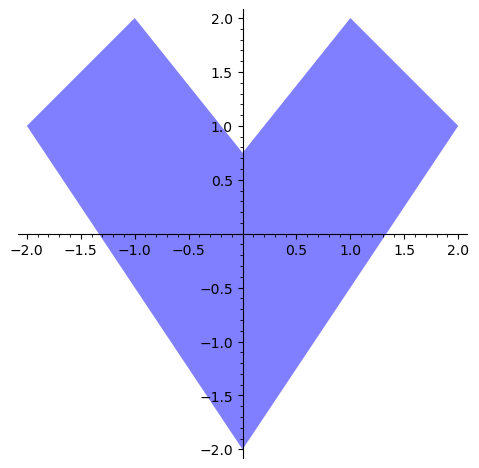

In [2]:
plt = polygon2d(vertices[:-1], alpha=0.5)
plt

In [3]:
def ip(f,g):
    integrand(t) = f*g
    return integrand.integrate(t, 0, 2*pi)
def norm_squared(f):
    return ip(f, f)

In [4]:
var('t')
basis = [vector([1,0]), vector([0,1])]
for n in range(1, frequency_bound+1):
    basis.append(vector([cos(n*t), 0]))
    basis.append(vector([sin(n*t), 0]))
    basis.append(vector([0, cos(n*t)]))
    basis.append(vector([0, sin(n*t)]))
basis 

[(1, 0),
 (0, 1),
 (cos(t), 0),
 (sin(t), 0),
 (0, cos(t)),
 (0, sin(t)),
 (cos(2*t), 0),
 (sin(2*t), 0),
 (0, cos(2*t)),
 (0, sin(2*t)),
 (cos(3*t), 0),
 (sin(3*t), 0),
 (0, cos(3*t)),
 (0, sin(3*t)),
 (cos(4*t), 0),
 (sin(4*t), 0),
 (0, cos(4*t)),
 (0, sin(4*t)),
 (cos(5*t), 0),
 (sin(5*t), 0),
 (0, cos(5*t)),
 (0, sin(5*t)),
 (cos(6*t), 0),
 (sin(6*t), 0),
 (0, cos(6*t)),
 (0, sin(6*t))]

In [5]:
# Check orthogonality
for i in range(len(basis)):
    fi = basis[i]
    for j in range(i+1, len(basis)):
        fj = basis[j]
        if ip(fi, fj) != 0:
            print(i,j)

In [6]:
for b in basis:
    print(ip(b,b), b)

2*pi (1, 0)
2*pi (0, 1)
pi (cos(t), 0)
pi (sin(t), 0)
pi (0, cos(t))
pi (0, sin(t))
pi (cos(2*t), 0)
pi (sin(2*t), 0)
pi (0, cos(2*t))
pi (0, sin(2*t))
pi (cos(3*t), 0)
pi (sin(3*t), 0)
pi (0, cos(3*t))
pi (0, sin(3*t))
pi (cos(4*t), 0)
pi (sin(4*t), 0)
pi (0, cos(4*t))
pi (0, sin(4*t))
pi (cos(5*t), 0)
pi (sin(5*t), 0)
pi (0, cos(5*t))
pi (0, sin(5*t))
pi (cos(6*t), 0)
pi (sin(6*t), 0)
pi (0, cos(6*t))
pi (0, sin(6*t))


In [7]:
times = [2*pi*time/times[-1] for time in times]
times

[0, 2/9*pi, 4/9*pi, 2/3*pi, 10/9*pi, 4/3*pi, 14/9*pi, 16/9*pi, 2*pi]

In [8]:
vertices = [vector(v) for v in vertices]
vertices

[(0, -2),
 (2, 1),
 (1, 2),
 (0, 3/4),
 (0, 3/4),
 (-1, 2),
 (-2, 1),
 (0, -2),
 (0, -2)]

In [9]:
segments = []
for i in range(len(vertices)-1):
    vi = vertices[i]
    vj = vertices[i+1]
    ti = times[i]
    tj = times[i+1]
    seg(t) = (tj-t)/(tj-ti)*vi + (t-ti)/(tj-ti)*vj
    segments.append(seg)
segments

[t |--> (9*t/pi, -(2*pi - 9*t)/pi + 9/2*t/pi),
 t |--> ((4*pi - 9*t)/pi - 1/2*(2*pi - 9*t)/pi, 1/2*(4*pi - 9*t)/pi - (2*pi - 9*t)/pi),
 t |--> (3/2*(2*pi - 3*t)/pi, -3/8*(4*pi - 9*t)/pi + 3*(2*pi - 3*t)/pi),
 t |--> (0, 3/16*(10*pi - 9*t)/pi - 9/16*(2*pi - 3*t)/pi),
 t |--> (1/2*(10*pi - 9*t)/pi, -(10*pi - 9*t)/pi + 9/8*(4*pi - 3*t)/pi),
 t |--> (-1/2*(14*pi - 9*t)/pi + 3*(4*pi - 3*t)/pi, (14*pi - 9*t)/pi - 3/2*(4*pi - 3*t)/pi),
 t |--> (-(16*pi - 9*t)/pi, 1/2*(16*pi - 9*t)/pi + (14*pi - 9*t)/pi),
 t |--> (0, (16*pi - 9*t)/pi - 9*(2*pi - t)/pi)]

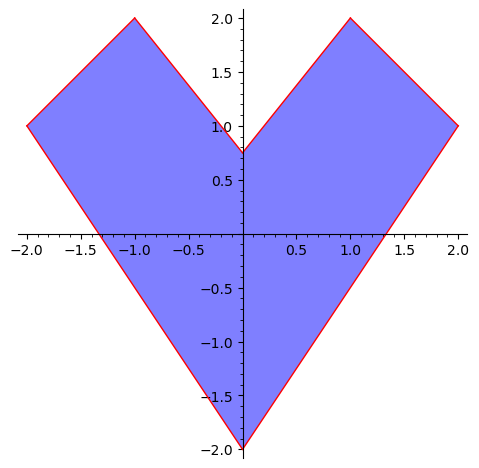

In [10]:
plt2 = plt
for i in range(len(vertices)-1):
    ti = times[i]
    tj = times[i+1]
    seg = segments[i]
    plt2 += parametric_plot(seg, (t, ti, tj), color='red')
plt2

In [11]:
def pairing_with_gamma(f):
    total = 0
    for i in range(len(vertices)-1):
        ti = times[i]
        tj = times[i+1]
        seg = segments[i]
        integrand(t) = seg*f
        total += numerical_integral(integrand, ti, tj)[0]
    return total

In [12]:
cv = [pairing_with_gamma(b)/2/pi if i<2 else pairing_with_gamma(b)/pi
      for i,b in enumerate(basis)]
cv

[-(8.326672684688674e-16)/pi,
 1.4835298641951806/pi,
 1.2455888492308036/pi,
 3.422227237186104/pi,
 -3.3710314391438736/pi,
 1.226955102623929/pi,
 1.0575952898416765/pi,
 1.2603929861795313/pi,
 -3.0885638626817777/pi,
 2.5916127980437524/pi,
 -0.7161972439135285/pi,
 -0.4134966715663456/pi,
 -0.47746482927568745/pi,
 0.8269933431326874/pi,
 -0.7451090752387057/pi,
 -0.1313828335353181/pi,
 0.042821547980428254/pi,
 -0.2428530665492976/pi,
 -0.47686980815277236/pi,
 0.08408501346260461/pi,
 0.027405790707473787/pi,
 0.15542596259154995/pi,
 -0.17904931097838112/pi,
 0.10337416789158738/pi,
 -0.11936620731892422/pi,
 -0.20674833578317098/pi]

In [13]:
g = sum(cv[i]*basis[i] for i in range(len(basis)))
g

(-0.17904931097838112*cos(6*t)/pi - 0.47686980815277236*cos(5*t)/pi - 0.7451090752387057*cos(4*t)/pi - 0.7161972439135285*cos(3*t)/pi + 1.0575952898416765*cos(2*t)/pi + 1.2455888492308036*cos(t)/pi + 0.10337416789158738*sin(6*t)/pi + 0.08408501346260461*sin(5*t)/pi - 0.1313828335353181*sin(4*t)/pi - 0.4134966715663456*sin(3*t)/pi + 1.2603929861795313*sin(2*t)/pi + 3.422227237186104*sin(t)/pi - (8.326672684688674e-16)/pi, -0.11936620731892422*cos(6*t)/pi + 0.027405790707473787*cos(5*t)/pi + 0.042821547980428254*cos(4*t)/pi - 0.47746482927568745*cos(3*t)/pi - 3.0885638626817777*cos(2*t)/pi - 3.3710314391438736*cos(t)/pi - 0.20674833578317098*sin(6*t)/pi + 0.15542596259154995*sin(5*t)/pi - 0.2428530665492976*sin(4*t)/pi + 0.8269933431326874*sin(3*t)/pi + 2.5916127980437524*sin(2*t)/pi + 1.226955102623929*sin(t)/pi + 1.4835298641951806/pi)

In [14]:
plt3 = parametric_plot(g, (t, 0, 2*pi))

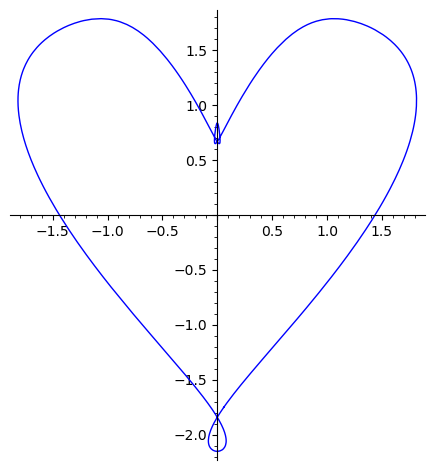

In [15]:
plt3

In [16]:
def approximate_polygon(frequency_bound, vertices, times = 'count'):
    r'''Given a frequency bound, we approximate the polygonal path joining 
    the vertices by a finite Fourier series defined over the interval [0, 2*pi].

    We require that the first vertex and the last vertex are equal.

    `times` should either be:
    * A list of times at which the path should visit each vertex. The first item 
      of the list should be zero, but we do not require that the last be 2*pi, 
      because we will rescale the times.
    * The string 'count' in which case, times is the the list [0, 1, 2, ..., n-1] 
      where `n=len(vertices)`.
    * The string 'length' in which case the time between vertices is the Euclidean
      distance between the vertices.
    '''
    def basis(frequency_bound):
        var('t')
        basis = [(1, 0), (0, 1)]
        for i in range(1, frequency_bound+1):
            basis.append((sin(i*t), 0))
            basis.append((cos(i*t), 0))
            basis.append((0, sin(i*t)))
            basis.append((0, cos(i*t)))
        return basis
    basis_functions = matrix(SR, basis(frequency_bound))

    # Record the number of segments
    nv = len(vertices)-1
    # Ensure vertices are vectors:
    vertices = [vector(v) for v in vertices]

    if times == 'count':
        times = list(range(len(vertices)))
    elif times == 'length':
        traveled = RDF(0)
        times = [traveled]
        for i in range(nv):
            traveled += (vertices[i+1]-vertices[i]).norm()
            times.append(traveled)
    assert len(times) == len(vertices), 'times should have the same length as vertices.'
    #rescale times to be in the interval [0, 2*pi]
    times = [t*2*pi/times[-1] for t in times]

    segments = []
    for i in range(nv):
        a = times[i]
        b = times[i+1]
        seg(t) = (1/(b-a) * ((b-t)*vertices[i]+(t-a)*vertices[i+1])).simplify()
        segments.append(seg)

    # We implement the pairing with the boundary curve (gamma in the problem statement)
    # We use numerical integration which is faster than symbolic.
    def pair_with_polygon(f):
        total = 0
        xf,yf = f
        for i in range(nv):
            xs,ys = segments[i]
            integrand(t) = xs*xf + ys*yf
            total += numerical_integral(integrand, times[i], times[i+1])[0]
        return total

    # Version that does not use the norm_squared:
    cv = vector([pair_with_polygon(f)/RDF(2*pi) if i < 2 else pair_with_polygon(f)/RDF(pi)
                 for i,f in enumerate(basis_functions.rows())])
    approx(t) = cv*basis_functions
    return approx

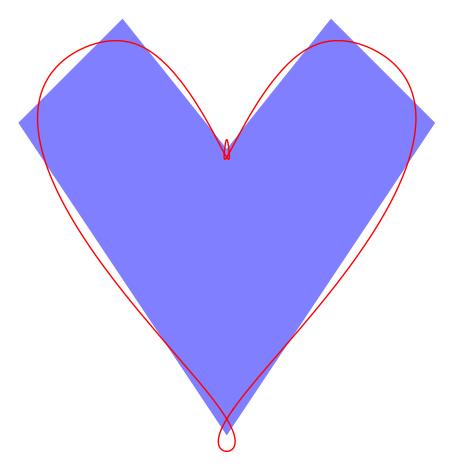

In [17]:
vertices = [(0, -2), (2, 1), (1, 2), (0, 3/4), (0, 3/4), (-1, 2), (-2, 1),(0, -2),(0, -2)]
times =    [      0,      1,      2,        3,        5,       6,       7,      8,      9]
plt1 = polygon2d(vertices, alpha=0.5, axes=False)
approx = approximate_polygon(6, vertices, times)
plt2 = parametric_plot(approx(t), (t, 0, 2*pi), color='red', axes=False)
plt1 + plt2

In [18]:
@interact
def approx_pat(frequency_bound = input_box(0)):
    vertices = [(0, 0), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), 
                (3/2, 0), (2, 2), (5/2, 0), (9/4, 1), (7/4, 1), (9/4, 1), (5/2, 0), 
                (4, 0), (4, 2), (3, 2), (5, 2), (4, 2), (4, 0), (9/2, -1/2),
                (-1/2, -1/2), (0,0),
               ]
    plt1 = polygon2d(vertices, alpha=0.5, axes=False, thickness=2)
    approx = approximate_polygon(frequency_bound, vertices, 'count')
    plt2 = parametric_plot(approx(t), (t, 0, 2*pi), color='red', axes=False)
    show(plt1 + plt2)

Interactive function <function approx_pat at 0x7fed6e5e7ec0> with 1 widget
  frequency_bound: EvalText(value='0', description='frequency_bound', layout=Layout(max_width='81em'))

## Problem 2:

Write a function which given a `degree_bound` returns an orthonormal basis for the space of polynomials of degree $\leq n$ on the triangle $T$ with vertices $(0,0)$, $(1,0)$ and $(0,2)$ with respect to the inner product:
$$\langle f, g \rangle = \iint_T f(x,y) g(x,y)~dA.$$
Use the Graham-Schmidt Orthogonalization process!

In [19]:
n = 3

In [20]:
var('x y')
basis = []
for d in range(0, n+1):
    for i in range(0, d+1):
        basis.append(x^(d-i)*y^i)
basis

[1, x, y, x^2, x*y, y^2, x^3, x^2*y, x*y^2, y^3]

In [21]:
def ip(f,g):
    integrand(x,y) = f*g
    return integrand.integral(y, 0, 2-2*x).integral(x, 0, 1)    

In [22]:
ip(basis[4], basis[5])

2/15

In [23]:
ip(1, 1)

1

In [24]:
def projection(f, orthonormal_basis):
    total = 0
    for b in orthonormal_basis:
        total += ip(b,f)*b
    return total

In [34]:
new_basis = []
for vi in basis:
    diff = vi - projection(vi, new_basis)
    new_basis.append( (diff/sqrt(ip(diff, diff))).full_simplify().expand().factor() )

In [35]:
for b in new_basis:
    show(b)

1

sqrt(2)*(3*x - 1)

sqrt(6)*(x + y - 1)

sqrt(3)*(10*x^2 - 8*x + 1)

3*(5*x - 1)*(x + y - 1)

1/2*sqrt(15)*(2*x^2 + 6*x*y + 3*y^2 - 4*x - 6*y + 2)

70*x^3 - 90*x^2 + 30*x - 2

2*sqrt(3)*(21*x^2 - 12*x + 1)*(x + y - 1)

sqrt(5)*(2*x^2 + 6*x*y + 3*y^2 - 4*x - 6*y + 2)*(7*x - 1)

sqrt(7)*(2*x^2 + 10*x*y + 5*y^2 - 4*x - 10*y + 2)*(x + y - 1)

In [27]:
for i in range(len(new_basis)):
    wi = new_basis[i]
    for j in range(i+1, len(new_basis)):
        wj = new_basis[j]
        if ip(wi,wj) != 0:
            print(i,j)

In [28]:
for i in range(len(new_basis)):
    wi = new_basis[i]
    if ip(wi,wi) != 1:
        print(i)

We remark that SageMath has several [important families of orthonormal polynomials built in](https://doc.sagemath.org/html/en/reference/functions/sage/functions/orthogonal_polys.html). But, if you want something non-standard, you can do it yourself using Graham-Schmidt.